# Linear Model

ℹ️ Repository: [Auto MPG - UCI Machine Learning Repository]

ℹ️ Data URL: <https://archive.ics.uci.edu/static/public/9/data.csv>

🇺🇸 MPG means "Miles Per Gallon"

[Auto MPG - UCI Machine Learning Repository]: https://archive.ics.uci.edu/dataset/9/auto+mpg


In [1]:
import matplotlib.pyplot as plt
import seaborn as sns; sns.set_theme()

## Dataset

### With `ucimlrepo` and `pandas`

In [2]:
import pandas as pd

In [3]:
from ucimlrepo import fetch_ucirepo 
auto_mpg = fetch_ucirepo(id=9) 

assert isinstance(auto_mpg, dict)
print(list(auto_mpg.keys()))

['data', 'metadata', 'variables']


In [4]:
metadata = auto_mpg["metadata"]
assert isinstance(metadata, dict)
metadata

{'uci_id': 9,
 'name': 'Auto MPG',
 'repository_url': 'https://archive.ics.uci.edu/dataset/9/auto+mpg',
 'data_url': 'https://archive.ics.uci.edu/static/public/9/data.csv',
 'abstract': 'Revised from CMU StatLib library, data concerns city-cycle fuel consumption',
 'area': 'Other',
 'tasks': ['Regression'],
 'characteristics': ['Multivariate'],
 'num_instances': 398,
 'num_features': 7,
 'feature_types': ['Real', 'Categorical', 'Integer'],
 'demographics': [],
 'target_col': ['mpg'],
 'index_col': ['car_name'],
 'has_missing_values': 'yes',
 'missing_values_symbol': 'NaN',
 'year_of_dataset_creation': 1993,
 'last_updated': 'Thu Aug 10 2023',
 'dataset_doi': '10.24432/C5859H',
 'creators': ['R. Quinlan'],
 'intro_paper': None,
 'additional_info': {'summary': 'This dataset is a slightly modified version of the dataset provided in the StatLib library.  In line with the use by Ross Quinlan (1993) in predicting the attribute "mpg", 8 of the original instances were removed because they had 

In [5]:
variables = auto_mpg["variables"]
assert isinstance(variables, pd.DataFrame)
variables

,name,role,type,demographic,description,units,missing_values
0,displacement,Feature,Continuous,None,None,None,no
1,mpg,Target,Continuous,None,None,None,no
2,cylinders,Feature,Integer,None,None,None,no
3,horsepower,Feature,Continuous,None,None,None,yes
4,weight,Feature,Continuous,None,None,None,no
5,acceleration,Feature,Continuous,None,None,None,no
6,model_year,Feature,Integer,None,None,None,no
7,origin,Feature,Integer,None,None,None,no
8,car_name,ID,Categorical,None,None,None,no


In [6]:
data = auto_mpg["data"]

assert isinstance(data, dict)
list(data.keys())

['ids', 'features', 'targets', 'original', 'headers']

In [7]:
data["ids"]

,car_name
0,"chevrolet,chevelle,malibu"
1,"buick,skylark,320"
2,"plymouth,satellite"
3,"amc,rebel,sst"
4,"ford,torino"
...,...
393,"ford,mustang,gl"
394,"vw,pickup"
395,"dodge,rampage"
396,"ford,ranger"


In [8]:
X = data["features"]
assert isinstance(X, pd.DataFrame)
X

,displacement,cylinders,horsepower,weight,acceleration,model_year,origin
0,307.0,8,130.0,3504,12.0,70,1
1,350.0,8,165.0,3693,11.5,70,1
2,318.0,8,150.0,3436,11.0,70,1
3,304.0,8,150.0,3433,12.0,70,1
4,302.0,8,140.0,3449,10.5,70,1
...,...,...,...,...,...,...,...
393,140.0,4,86.0,2790,15.6,82,1
394,97.0,4,52.0,2130,24.6,82,2
395,135.0,4,84.0,2295,11.6,82,1
396,120.0,4,79.0,2625,18.6,82,1


In [9]:
y = data["targets"]
assert isinstance(y, pd.DataFrame)
y

,mpg
0,18.0
1,15.0
2,18.0
3,16.0
4,17.0
...,...
393,27.0
394,44.0
395,32.0
396,28.0


### From the CSV file (with pandas)

In [10]:
import csv

import pandas as pd
import requests

In [11]:
r = requests.get("https://archive.ics.uci.edu/static/public/9/data.csv")
for line in r.text.splitlines()[:10]:
    print(line)
print("...")
with open("data/auto_mpg.csv", mode="tw", encoding="utf-8") as file:
    file.write(r.text)

car_name,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,mpg
"chevrolet,chevelle,malibu",8,307,130,3504,12,70,1,18
"buick,skylark,320",8,350,165,3693,11.5,70,1,15
"plymouth,satellite",8,318,150,3436,11,70,1,18
"amc,rebel,sst",8,304,150,3433,12,70,1,16
"ford,torino",8,302,140,3449,10.5,70,1,17
"ford,galaxie,500",8,429,198,4341,10,70,1,15
"chevrolet,impala",8,454,220,4354,9,70,1,14
"plymouth,fury,iii",8,440,215,4312,8.5,70,1,14
"pontiac,catalina",8,455,225,4425,10,70,1,14
...


In [12]:
df = pd.read_csv("data/auto_mpg.csv")
df

,car_name,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,mpg
0,"chevrolet,chevelle,malibu",8,307.0,130.0,3504,12.0,70,1,18.0
1,"buick,skylark,320",8,350.0,165.0,3693,11.5,70,1,15.0
2,"plymouth,satellite",8,318.0,150.0,3436,11.0,70,1,18.0
3,"amc,rebel,sst",8,304.0,150.0,3433,12.0,70,1,16.0
4,"ford,torino",8,302.0,140.0,3449,10.5,70,1,17.0
...,...,...,...,...,...,...,...,...,...
393,"ford,mustang,gl",4,140.0,86.0,2790,15.6,82,1,27.0
394,"vw,pickup",4,97.0,52.0,2130,24.6,82,2,44.0
395,"dodge,rampage",4,135.0,84.0,2295,11.6,82,1,32.0
396,"ford,ranger",4,120.0,79.0,2625,18.6,82,1,28.0


## Data Cleanup

In [13]:
df.isna().any()

car_name        False
cylinders       False
displacement    False
horsepower       True
weight          False
acceleration    False
model_year      False
origin          False
mpg             False
dtype: bool

In [14]:
df = df.dropna().reset_index(drop=True)
df

,car_name,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,mpg
0,"chevrolet,chevelle,malibu",8,307.0,130.0,3504,12.0,70,1,18.0
1,"buick,skylark,320",8,350.0,165.0,3693,11.5,70,1,15.0
2,"plymouth,satellite",8,318.0,150.0,3436,11.0,70,1,18.0
3,"amc,rebel,sst",8,304.0,150.0,3433,12.0,70,1,16.0
4,"ford,torino",8,302.0,140.0,3449,10.5,70,1,17.0
...,...,...,...,...,...,...,...,...,...
387,"ford,mustang,gl",4,140.0,86.0,2790,15.6,82,1,27.0
388,"vw,pickup",4,97.0,52.0,2130,24.6,82,2,44.0
389,"dodge,rampage",4,135.0,84.0,2295,11.6,82,1,32.0
390,"ford,ranger",4,120.0,79.0,2625,18.6,82,1,28.0


In [15]:
df.isna().any()

car_name        False
cylinders       False
displacement    False
horsepower      False
weight          False
acceleration    False
model_year      False
origin          False
mpg             False
dtype: bool

In [16]:
set(df["origin"])

{1, 2, 3}

In [17]:
list(df[df["origin"] == 1]["car_name"].values)

['chevrolet,chevelle,malibu',
 'buick,skylark,320',
 'plymouth,satellite',
 'amc,rebel,sst',
 'ford,torino',
 'ford,galaxie,500',
 'chevrolet,impala',
 'plymouth,fury,iii',
 'pontiac,catalina',
 'amc,ambassador,dpl',
 'dodge,challenger,se',
 "plymouth,'cuda,340",
 'chevrolet,monte,carlo',
 'buick,estate,wagon,(sw)',
 'plymouth,duster',
 'amc,hornet',
 'ford,maverick',
 'amc,gremlin',
 'ford,f250',
 'chevy,c20',
 'dodge,d200',
 'hi,1200d',
 'chevrolet,vega,2300',
 'amc,gremlin',
 'plymouth,satellite,custom',
 'chevrolet,chevelle,malibu',
 'ford,torino,500',
 'amc,matador',
 'chevrolet,impala',
 'pontiac,catalina,brougham',
 'ford,galaxie,500',
 'plymouth,fury,iii',
 'dodge,monaco,(sw)',
 'ford,country,squire,(sw)',
 'pontiac,safari,(sw)',
 'amc,hornet,sportabout,(sw)',
 'chevrolet,vega,(sw)',
 'pontiac,firebird',
 'ford,mustang',
 'mercury,capri,2000',
 'plymouth,cricket',
 'dodge,colt,hardtop',
 'chevrolet,vega',
 'ford,pinto,runabout',
 'chevrolet,impala',
 'pontiac,catalina',
 'plymo

In [18]:
list(df[df["origin"] == 2]["car_name"].values)

['volkswagen,1131,deluxe,sedan',
 'peugeot,504',
 'audi,100,ls',
 'saab,99e',
 'bmw,2002',
 'opel,1900',
 'peugeot,304',
 'fiat,124b',
 'volkswagen,model,111',
 'volkswagen,type,3',
 'volvo,145e,(sw)',
 'volkswagen,411,(sw)',
 'peugeot,504,(sw)',
 'renault,12,(sw)',
 'volkswagen,super,beetle',
 'fiat,124,sport,coupe',
 'fiat,128',
 'opel,manta',
 'audi,100ls',
 'volvo,144ea',
 'saab,99le',
 'audi,fox',
 'volkswagen,dasher',
 'opel,manta',
 'fiat,128',
 'fiat,124,tc',
 'fiat,x1.9',
 'volkswagen,dasher',
 'volkswagen,rabbit',
 'audi,100ls',
 'peugeot,504',
 'volvo,244dl',
 'saab,99le',
 'fiat,131',
 'opel,1900',
 'renault,12tl',
 'vw,rabbit',
 'volkswagen,rabbit',
 'volvo,245',
 'peugeot,504',
 'mercedes-benz,280s',
 'renault,5,gtl',
 'volkswagen,rabbit,custom',
 'volkswagen,dasher',
 'bmw,320i',
 'volkswagen,rabbit,custom,diesel',
 'audi,5000',
 'volvo,264gl',
 'saab,99gle',
 'peugeot,604sl',
 'volkswagen,scirocco',
 'vw,rabbit,custom',
 'mercedes,benz,300d',
 'peugeot,504',
 'fiat,stra

In [19]:
list(df[df["origin"] == 3]["car_name"].values)

['toyota,corona,mark,ii',
 'datsun,pl510',
 'datsun,pl510',
 'toyota,corona',
 'toyota,corolla,1200',
 'datsun,1200',
 'toyota,corona,hardtop',
 'mazda,rx2,coupe',
 'datsun,510,(sw)',
 'toyouta,corona,mark,ii,(sw)',
 'toyota,corolla,1600,(sw)',
 'toyota,carina',
 'datsun,610',
 'maxda,rx3',
 'toyota,mark,ii',
 'datsun,b210',
 'toyota,corolla,1200',
 'toyota,corona',
 'datsun,710',
 'honda,civic',
 'subaru',
 'toyota,corolla',
 'toyota,corona',
 'datsun,710',
 'honda,civic,cvcc',
 'honda,civic',
 'datsun,b-210',
 'toyota,corolla',
 'toyota,mark,ii',
 'honda,accord,cvcc',
 'datsun,f-10,hatchback',
 'toyota,corolla,liftback',
 'subaru,dl',
 'datsun,810',
 'mazda,rx-4',
 'mazda,glc,deluxe',
 'datsun,b210,gx',
 'honda,civic,cvcc',
 'toyota,corona',
 'datsun,510',
 'toyota,celica,gt,liftback',
 'datsun,200-sx',
 'honda,accord,lx',
 'maxda,glc,deluxe',
 'datsun,210',
 'toyota,corolla,tercel',
 'datsun,310',
 'toyota,corona,liftback',
 'mazda,626',
 'datsun,510,hatchback',
 'toyota,corolla',
 

In [20]:
def region(i):
    if i == 1:
        return "USA"
    elif i == 2:
        return "Europe"
    elif i == 3:
        return "Asia"
df["origin"] = df["origin"].transform(region)
df

,car_name,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,mpg
0,"chevrolet,chevelle,malibu",8,307.0,130.0,3504,12.0,70,USA,18.0
1,"buick,skylark,320",8,350.0,165.0,3693,11.5,70,USA,15.0
2,"plymouth,satellite",8,318.0,150.0,3436,11.0,70,USA,18.0
3,"amc,rebel,sst",8,304.0,150.0,3433,12.0,70,USA,16.0
4,"ford,torino",8,302.0,140.0,3449,10.5,70,USA,17.0
...,...,...,...,...,...,...,...,...,...
387,"ford,mustang,gl",4,140.0,86.0,2790,15.6,82,USA,27.0
388,"vw,pickup",4,97.0,52.0,2130,24.6,82,Europe,44.0
389,"dodge,rampage",4,135.0,84.0,2295,11.6,82,USA,32.0
390,"ford,ranger",4,120.0,79.0,2625,18.6,82,USA,28.0


In [21]:
import seaborn as sns

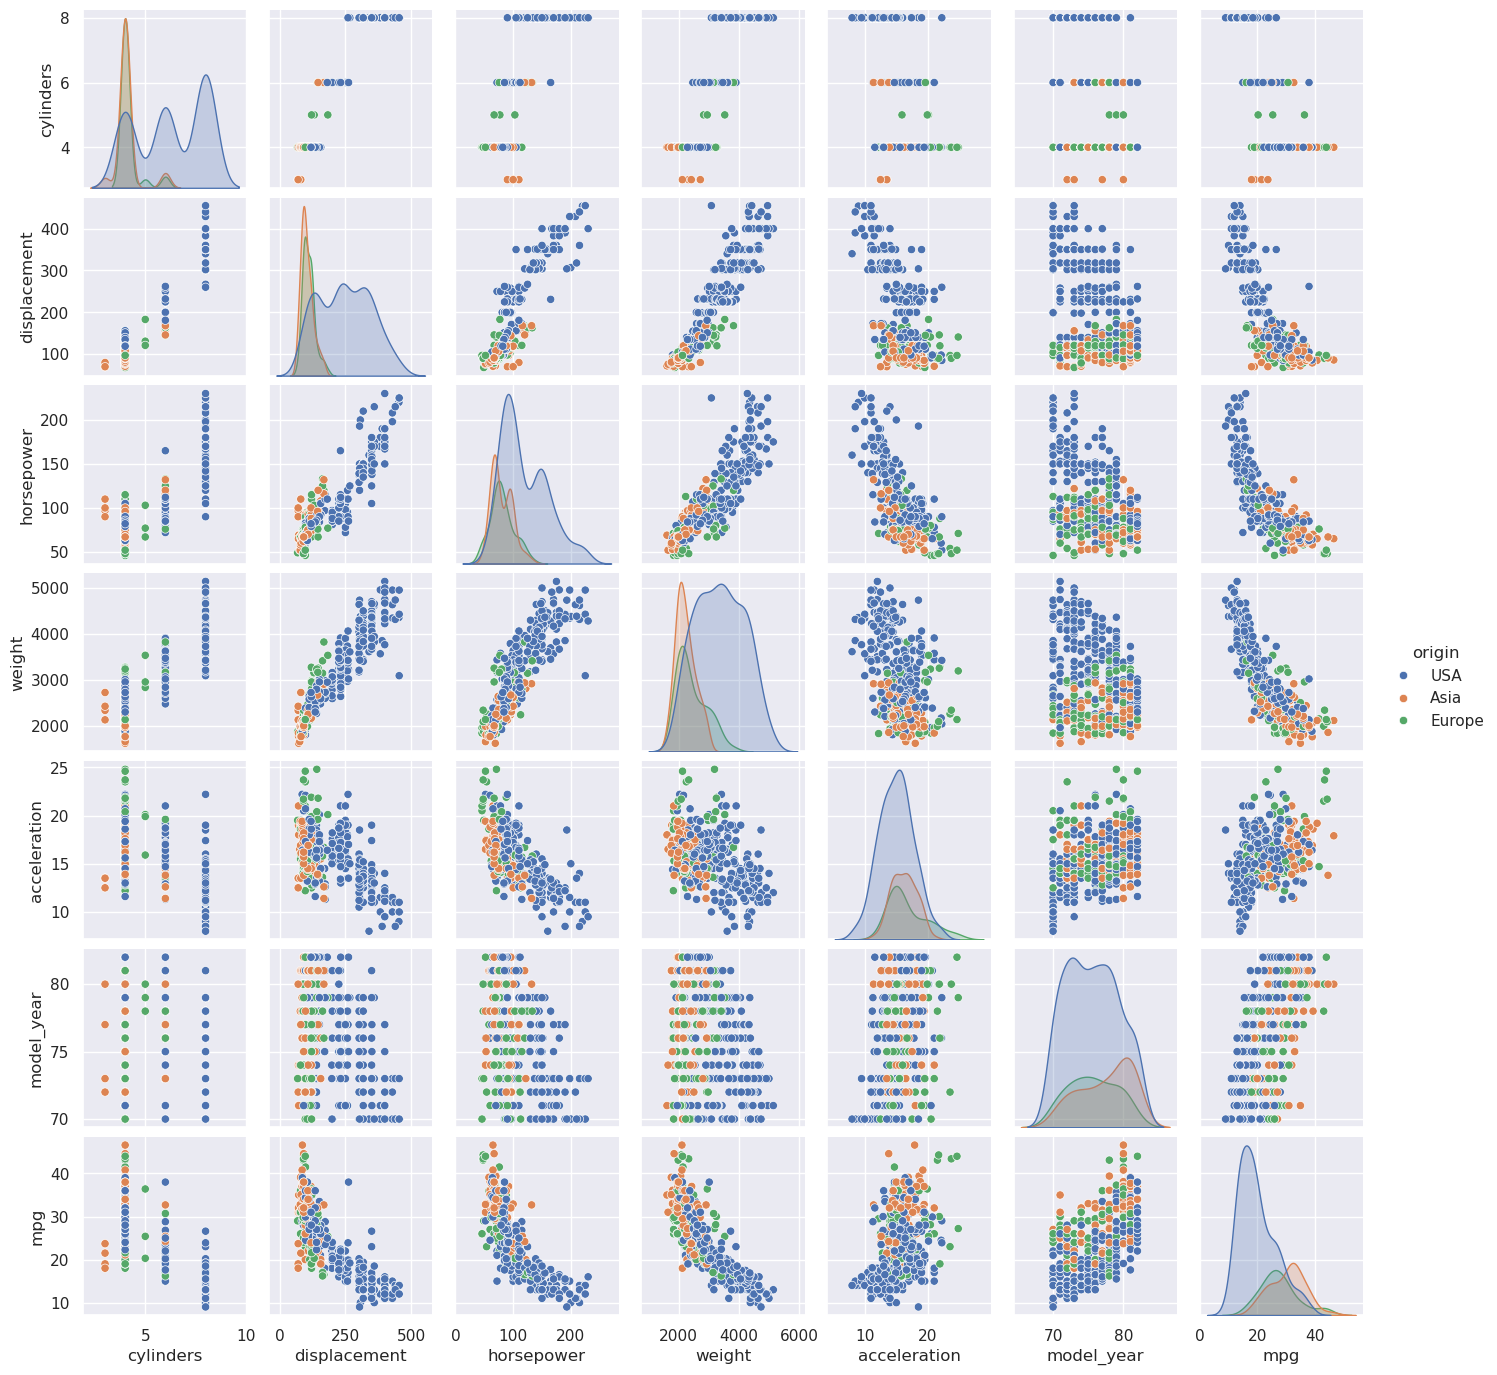

In [22]:
#scatterplot
sns.set()
sns.pairplot(df, height=2.0, hue="origin")
None

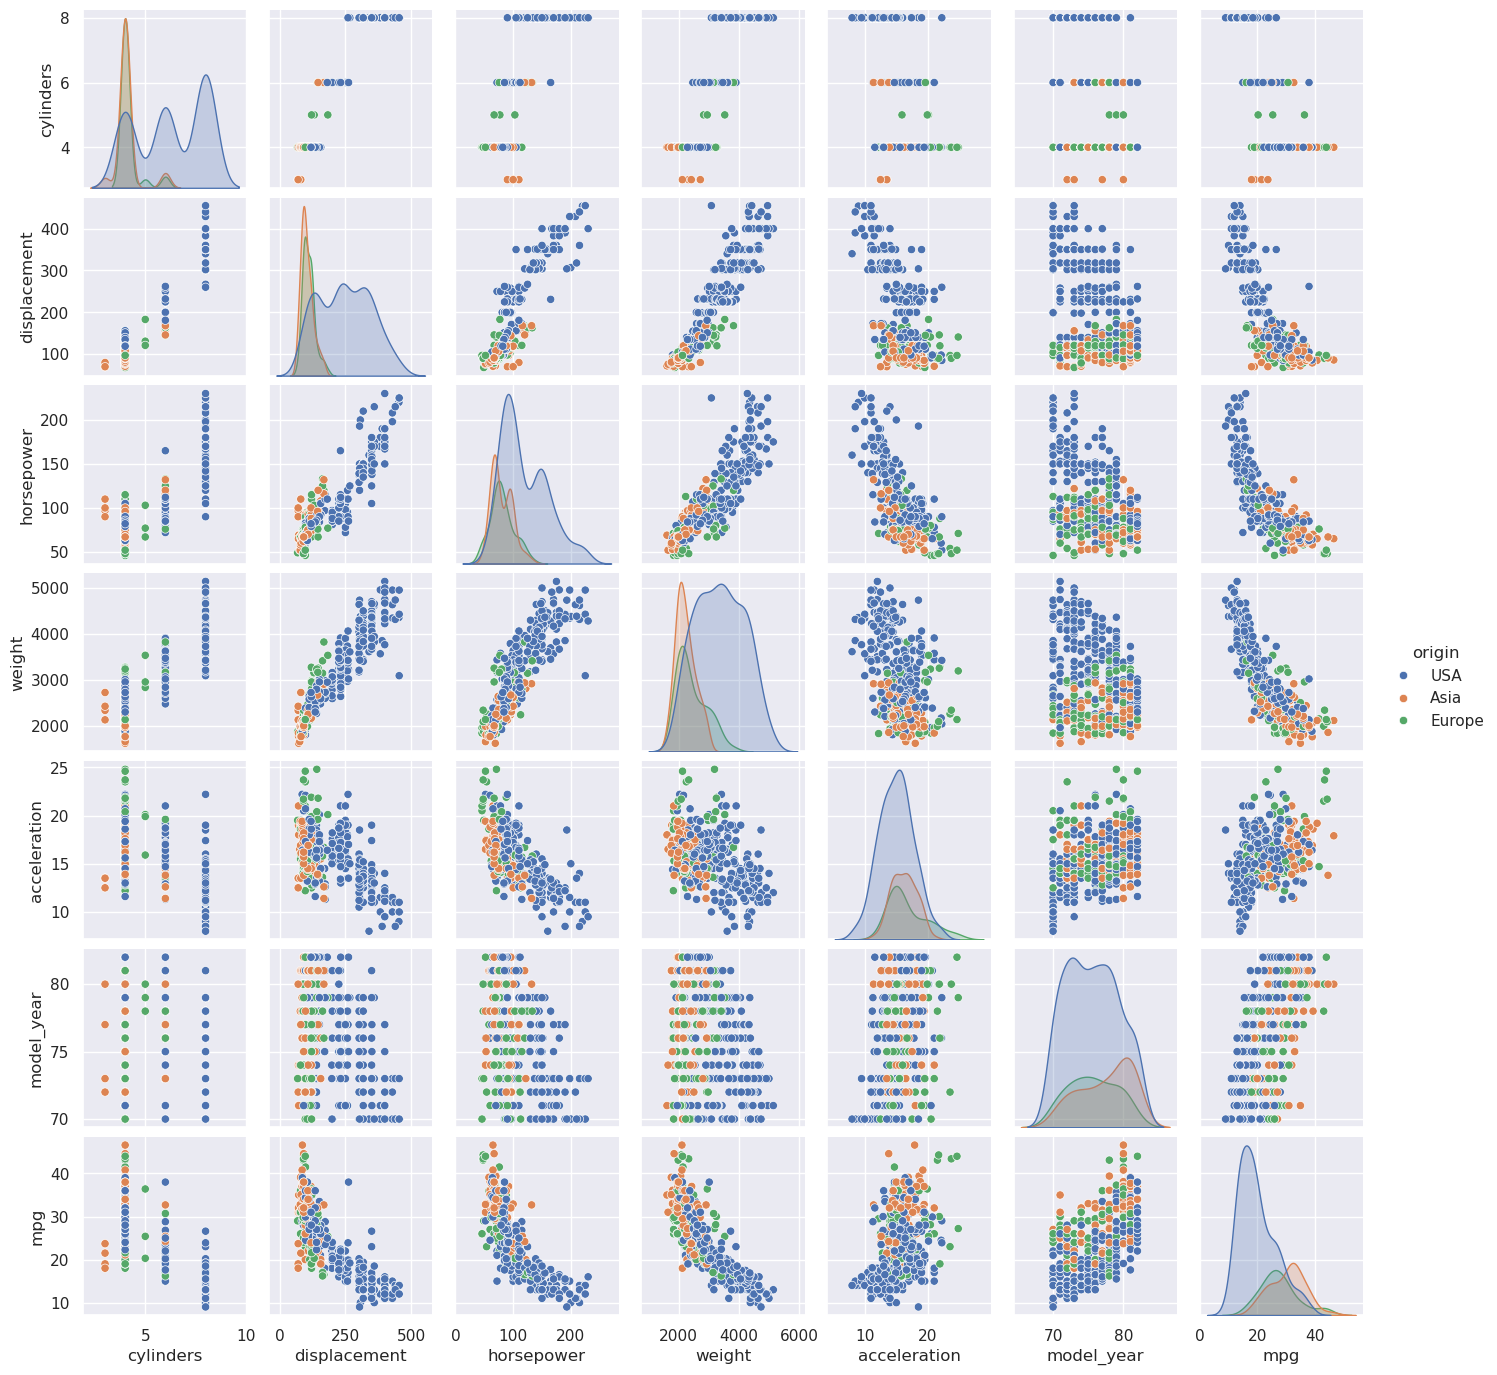

In [23]:
#scatterplot
sns.set()
sns.pairplot(df, height=2.0, hue="origin")
None

## Torch

In [24]:
import torch
import torch.linalg

In [25]:
m, _ = df.shape
m

392

In [26]:
keys = ["cylinders", "displacement", "horsepower", "weight", "acceleration", "model_year"]
df[keys]

,cylinders,displacement,horsepower,weight,acceleration,model_year
0,8,307.0,130.0,3504,12.0,70
1,8,350.0,165.0,3693,11.5,70
2,8,318.0,150.0,3436,11.0,70
3,8,304.0,150.0,3433,12.0,70
4,8,302.0,140.0,3449,10.5,70
...,...,...,...,...,...,...
387,4,140.0,86.0,2790,15.6,82
388,4,97.0,52.0,2130,24.6,82
389,4,135.0,84.0,2295,11.6,82
390,4,120.0,79.0,2625,18.6,82


In [27]:
X_1 = torch.tensor(df[keys].values)
X_1

tensor([[   8.0000,  307.0000,  130.0000, 3504.0000,   12.0000,   70.0000],
        [   8.0000,  350.0000,  165.0000, 3693.0000,   11.5000,   70.0000],
        [   8.0000,  318.0000,  150.0000, 3436.0000,   11.0000,   70.0000],
        ...,
        [   4.0000,  135.0000,   84.0000, 2295.0000,   11.6000,   82.0000],
        [   4.0000,  120.0000,   79.0000, 2625.0000,   18.6000,   82.0000],
        [   4.0000,  119.0000,   82.0000, 2720.0000,   19.4000,   82.0000]],
       dtype=torch.float64)

In [28]:
# Deal with origin with one-hot encoding
USA = torch.tensor((df["origin"] == "USA").values).reshape((m, 1))
Europe = torch.tensor((df["origin"] == "Europe").values).reshape((m, 1))
Asia = torch.tensor((df["origin"] == "Asia").values).reshape((m, 1))
X_2 = torch.cat([USA, Europe, Asia], 1)
X_2

tensor([[ True, False, False],
        [ True, False, False],
        [ True, False, False],
        ...,
        [ True, False, False],
        [ True, False, False],
        [ True, False, False]])

In [29]:
X_3 = torch.ones((m, 1), dtype=torch.float64)
X_3

tensor([[1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
      

In [30]:
m, n = X.shape
X = torch.cat((X_1, X_2, X_3), 1)
X

tensor([[  8., 307., 130.,  ...,   0.,   0.,   1.],
        [  8., 350., 165.,  ...,   0.,   0.,   1.],
        [  8., 318., 150.,  ...,   0.,   0.,   1.],
        ...,
        [  4., 135.,  84.,  ...,   0.,   0.,   1.],
        [  4., 120.,  79.,  ...,   0.,   0.,   1.],
        [  4., 119.,  82.,  ...,   0.,   0.,   1.]], dtype=torch.float64)

In [31]:
y = torch.tensor(df["mpg"].values)
y

tensor([18.0000, 15.0000, 18.0000, 16.0000, 17.0000, 15.0000, 14.0000, 14.0000,
        14.0000, 15.0000, 15.0000, 14.0000, 15.0000, 14.0000, 24.0000, 22.0000,
        18.0000, 21.0000, 27.0000, 26.0000, 25.0000, 24.0000, 25.0000, 26.0000,
        21.0000, 10.0000, 10.0000, 11.0000,  9.0000, 27.0000, 28.0000, 25.0000,
        19.0000, 16.0000, 17.0000, 19.0000, 18.0000, 14.0000, 14.0000, 14.0000,
        14.0000, 12.0000, 13.0000, 13.0000, 18.0000, 22.0000, 19.0000, 18.0000,
        23.0000, 28.0000, 30.0000, 30.0000, 31.0000, 35.0000, 27.0000, 26.0000,
        24.0000, 25.0000, 23.0000, 20.0000, 21.0000, 13.0000, 14.0000, 15.0000,
        14.0000, 17.0000, 11.0000, 13.0000, 12.0000, 13.0000, 19.0000, 15.0000,
        13.0000, 13.0000, 14.0000, 18.0000, 22.0000, 21.0000, 26.0000, 22.0000,
        28.0000, 23.0000, 28.0000, 27.0000, 13.0000, 14.0000, 13.0000, 14.0000,
        15.0000, 12.0000, 13.0000, 13.0000, 14.0000, 13.0000, 12.0000, 13.0000,
        18.0000, 16.0000, 18.0000, 18.00

In [32]:
r = torch.linalg.lstsq(X, y)

In [33]:
A = r.solution
A

tensor([-4.8971e-01,  2.3979e-02, -1.8183e-02, -6.7104e-03,  7.9103e-02,
         7.7703e-01, -5.8595e+00, -3.2295e+00, -3.0062e+00, -1.2095e+01],
       dtype=torch.float64)

In [34]:
y_hat = torch.tensordot(X, A, dims=1)
e = y - y_hat

In [35]:
import matplotlib.pyplot as plt

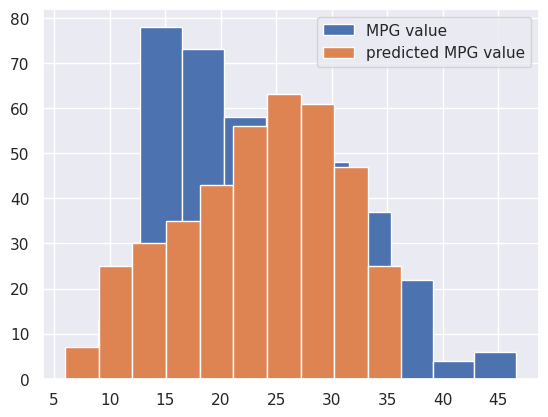

In [36]:
plt.hist(y, label="MPG value")
plt.hist(y_hat, label="predicted MPG value")
plt.legend()
None

In [37]:
e = y - y_hat

If $\mu$ denotes the mean of $e$ 
$$
\mu = \frac{1}{n} \sum_{k=1}^n e_k
$$
and $\sigma$ its (biased, uncorrected) standard deviation
$$
\sigma = \sqrt{\frac{1}{n}\sum_{k=1}^n (e_k - \mu)^2}
$$
then the mean quadratic error $\ell$ (our loss function) satisfies
$$
\ell = \sqrt{\frac{1}{n}\sum_{k=1}^n e_k^2} = \sqrt{\mu^2 + \sigma^2}.
$$

In [38]:
def loss(e):
    return (e.mean()**2 + e.std(unbiased=False)**2).sqrt().item()

def loss_alt(e):
    return (e**2).mean().sqrt().item()

loss(e), loss_alt(e)

(3.268351515330417, 3.268351515330418)

In [39]:
print("Mean MPG value:", y.mean().item())
print("Mean MPG prediction error:", e.abs().mean().item())
print("Mean (quadratic) MPG prediction error:", loss(e))

Mean MPG value: 23.445918367346938
Mean MPG prediction error: 2.5053892973783323
Mean (quadratic) MPG prediction error: 3.268351515330417


In [40]:
df["mpg (pred.)"] = y_hat
df.to_csv("data/auto_mpg_pred.csv")

In [41]:
A

tensor([-4.8971e-01,  2.3979e-02, -1.8183e-02, -6.7104e-03,  7.9103e-02,
         7.7703e-01, -5.8595e+00, -3.2295e+00, -3.0062e+00, -1.2095e+01],
       dtype=torch.float64)

In [42]:
for k, slope in zip(keys + ["USA", "Europe", "Asia"] + ["bias"], A):
    print(k, slope.item())

cylinders -0.48970942404717077
displacement 0.02397864402787263
horsepower -0.01818346403885123
weight -0.0067103841273767634
acceleration 0.07910303601127909
model_year 0.7770269391010196
USA -5.859458163946225
Europe -3.229455803928856
Asia -3.0062299354687605
bias -12.095143903343844


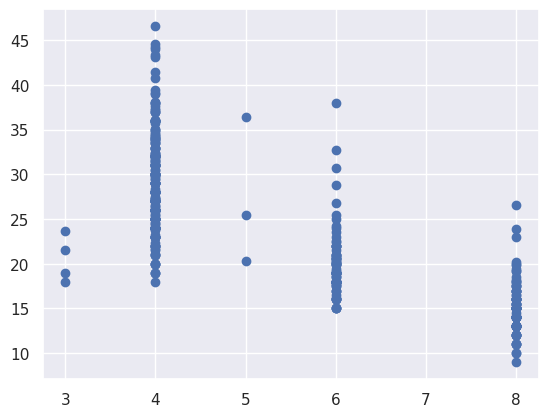

In [43]:
plt.scatter(X[:,0], y)

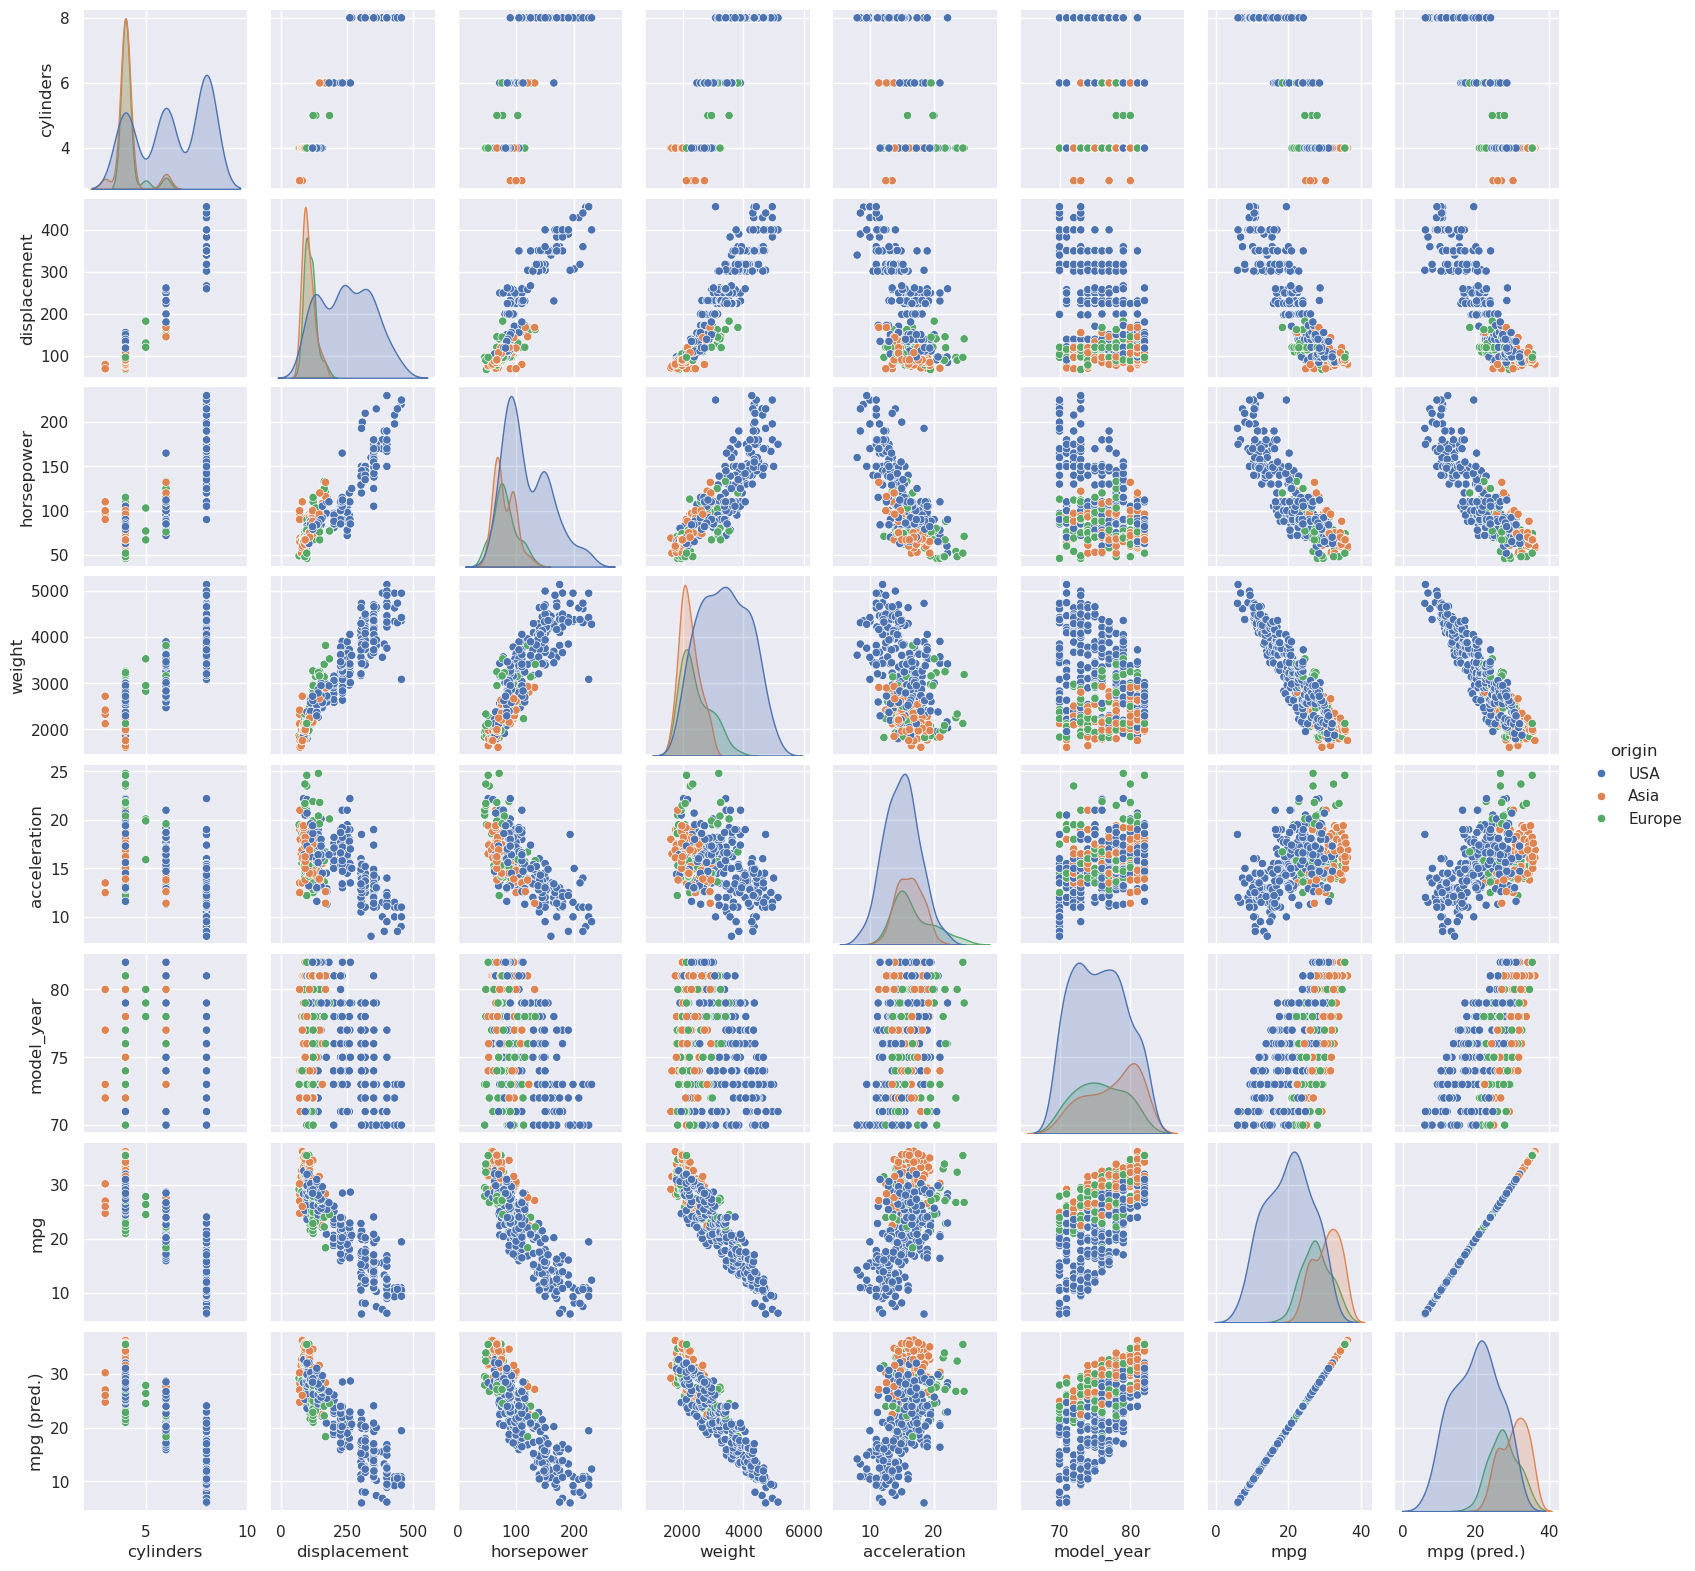

In [44]:
#scatterplot
df_hat = df.copy()
df_hat["mpg"] = y_hat
sns.set()
sns.pairplot(df_hat, height=2.0, hue="origin")
None

**TODO.**

  - Reorder the whole thing? Simple things first (linear model, original model, etc.) THEN assess limitations?
  - Measure the performance (lstsq)
  - Do it for the original variables as well as the inverted ones (should be better, right?)
  - Try nonlinear schemes to deal with some $1/x^{\alpha}$ with unknown alpha stuff.


In [45]:
def f(x):
    return 1.0 / x
df["displacement"] = df["displacement"].transform(f)
df["horsepower"] = df["horsepower"].transform(f)
df["weight"] = df["weight"].transform(f)